In [1]:
#import modules for machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#fucntion to load data and carry out all the operations
def load_data(path1,path2):
    df_test = pd.read_csv(path1)
    df_train = pd.read_csv(path2)
    Y_train = df_train['id']
    X_train = df_train.drop('id', axis=1)
    
    X_test = df_test.drop('id', axis=1)
    Y_test = df_test['id']
    return X_train, Y_train, X_test, Y_test

#function to carry out the operations

path1 = 'test/apaac_test.csv'
path2 = 'train/apaac_train.csv'
load_data(path1,path2)
X_train, Y_train, X_test, Y_test = load_data(path1,path2)
print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())


   APAAC1_A  APAAC1_C  APAAC1_D  APAAC1_E  APAAC1_F  APAAC1_G  APAAC1_H  \
0       0.0       0.0       0.0       0.0     50.00       0.0      0.00   
1       0.0       0.0       0.0       0.0      7.69       0.0      7.69   
2      30.0       0.0      10.0       0.0      0.00       0.0     10.00   
3      12.5       0.0      12.5      25.0      0.00      12.5      0.00   
4       0.0       0.0       0.0       0.0      0.00      50.0      0.00   

   APAAC1_I  APAAC1_K  APAAC1_L  ...  APAAC1_Q  APAAC1_R  APAAC1_S  APAAC1_T  \
0       0.0       0.0      0.00  ...      0.00       0.0     50.00      0.00   
1       0.0       0.0      7.69  ...      7.69       0.0     15.38      7.69   
2      10.0      10.0      0.00  ...     10.00      10.0      0.00      0.00   
3       0.0      12.5     12.50  ...      0.00       0.0     12.50      0.00   
4       0.0       0.0      0.00  ...      0.00       0.0      0.00      0.00   

   APAAC1_V  APAAC1_W  APAAC1_Y  APAAC1_HB_lam1  APAAC1_HL_lam1  \
0

In [2]:
# Import the necessary modules
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve, GridSearchCV
import numpy as np

# Define the algorithms
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
lr = LogisticRegression()
pls = PLSRegression(n_components=2)
rf = RandomForestClassifier()
svm = SVC()



# Fit the models
et.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
lr.fit(X_train, Y_train)
pls.fit(X_train, Y_train)
rf.fit(X_train, Y_train)
svm.fit(X_train, Y_train)

# Predict the labels
et_pred = et.predict(X_test)
knn_pred = knn.predict(X_test)
lr_pred = lr.predict(X_test)
pls_pred = pls.predict(X_test)
sample=pls_pred
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)

pls_pred=(sample>0.5).astype('uint8')

# Print the accuracy
et_acc = accuracy_score(Y_test, et_pred)
knn_acc = accuracy_score(Y_test, knn_pred)
lr_acc = accuracy_score(Y_test, lr_pred)
pls_acc = accuracy_score(Y_test, pls_pred)
rf_acc = accuracy_score(Y_test, rf_pred)
svm_acc = accuracy_score(Y_test, svm_pred)

/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
print("Accuracy of Extra Trees Classifier:", et_acc)
print("Accuracy of K-Nearest Neighbors Classifier:", knn_acc)
print("Accuracy of Logistic Regression:", lr_acc)
print("Accuracy of Partial Least Squares Regression:", pls_acc)
print("Accuracy of Random Forest Classifier:", rf_acc)
print("Accuracy of Support Vector Machine Classifier:", svm_acc)


Accuracy of Extra Trees Classifier: 0.8089887640449438
Accuracy of K-Nearest Neighbors Classifier: 0.7752808988764045
Accuracy of Logistic Regression: 0.8426966292134831
Accuracy of Partial Least Squares Regression: 0.8539325842696629
Accuracy of Random Forest Classifier: 0.8426966292134831
Accuracy of Support Vector Machine Classifier: 0.8314606741573034


In [27]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score


et_bacc = balanced_accuracy_score(Y_test, et_pred)
knn_bacc = balanced_accuracy_score(Y_test, knn_pred)
lr_bacc = balanced_accuracy_score(Y_test, lr_pred)
pls_bacc = balanced_accuracy_score(Y_test, pls_pred)
rf_bacc = balanced_accuracy_score(Y_test, rf_pred)
svm_bacc = balanced_accuracy_score(Y_test, svm_pred)

print("Balanced Accuracy of Extra Trees Classifier:", et_bacc)
print("Balanced Accuracy of K-Nearest Neighbors Classifier:", knn_bacc)
print("Balanced Accuracy of Logistic Regression:", lr_bacc)
print("Balanced Accuracy of Partial Least Squares Regression:", pls_bacc)
print("Balanced Accuracy of Random Forest Classifier:", rf_bacc)
print("Balanced Accuracy of Support Vector Machine Classifier:", svm_bacc)

et_mcc = matthews_corrcoef(Y_test, et_pred)
knn_mcc = matthews_corrcoef(Y_test, knn_pred)
lr_mcc = matthews_corrcoef(Y_test, lr_pred)
pls_mcc = matthews_corrcoef(Y_test, pls_pred)
rf_mcc = matthews_corrcoef(Y_test, rf_pred)
svm_mcc = matthews_corrcoef(Y_test, svm_pred)

print("Matthews Correlation Coefficient of Extra Trees Classifier:", et_mcc)
print("Matthews Correlation Coefficient of K-Nearest Neighbors Classifier:", knn_mcc)
print("Matthews Correlation Coefficient of Logistic Regression:", lr_mcc)
print("Matthews Correlation Coefficient of Partial Least Squares Regression:", pls_mcc)
print("Matthews Correlation Coefficient of Random Forest Classifier:", rf_mcc)
print("Matthews Correlation Coefficient of Support Vector Machine Classifier:", svm_mcc)

et_auc = roc_auc_score(Y_test, et_pred)
knn_auc = roc_auc_score(Y_test, knn_pred)
lr_auc = roc_auc_score(Y_test, lr_pred)
pls_auc = roc_auc_score(Y_test, pls_pred)
rf_auc = roc_auc_score(Y_test, rf_pred)
svm_auc = roc_auc_score(Y_test, svm_pred)

print("Area Under the Curve of Extra Trees Classifier:", et_auc)
print("Area Under the Curve of K-Nearest Neighbors Classifier:", knn_auc)
print("Area Under the Curve of Logistic Regression:", lr_auc)
print("Area Under the Curve of Partial Least Squares Regression:", pls_auc)
print("Area Under the Curve of Random Forest Classifier:", rf_auc)
print("Area Under the Curve of Support Vector Machine Classifier:", svm_auc)

Balanced Accuracy of Extra Trees Classifier: 0.758363201911589
Balanced Accuracy of K-Nearest Neighbors Classifier: 0.7132616487455197
Balanced Accuracy of Logistic Regression: 0.7825567502986858
Balanced Accuracy of Partial Least Squares Regression: 0.7906212664277181
Balanced Accuracy of Random Forest Classifier: 0.793010752688172
Balanced Accuracy of Support Vector Machine Classifier: 0.7954002389486261
Matthews Correlation Coefficient of Extra Trees Classifier: 0.5352739170018163
Matthews Correlation Coefficient of K-Nearest Neighbors Classifier: 0.4479036475359656
Matthews Correlation Coefficient of Logistic Regression: 0.61185611646733
Matthews Correlation Coefficient of Partial Least Squares Regression: 0.6401703716099351
Matthews Correlation Coefficient of Random Forest Classifier: 0.6153970283372301
Matthews Correlation Coefficient of Support Vector Machine Classifier: 0.5972575054894507
Area Under the Curve of Extra Trees Classifier: 0.758363201911589
Area Under the Curve of 

In [4]:
et_cm = confusion_matrix(Y_test, et_pred)
knn_cm = confusion_matrix(Y_test, knn_pred)
lr_cm = confusion_matrix(Y_test, lr_pred)
pls_cm = confusion_matrix(Y_test, pls_pred)
rf_cm = confusion_matrix(Y_test, rf_pred)
svm_cm = confusion_matrix(Y_test, svm_pred)

In [5]:

print("Confusion Matrix of Extra Trees Classifier:")
print(et_cm)
print("Confusion Matrix of K-Nearest Neighbors Classifier:")
print(knn_cm)
print("Confusion Matrix of Logistic Regression:")
print(lr_cm)
print("Confusion Matrix of Partial Least Squares Regression:")
print(pls_cm)
print("Confusion Matrix of Random Forest Classifier:")
print(rf_cm)
print("Confusion Matrix of Support Vector Machine Classifier:")
print(svm_cm)

Confusion Matrix of Extra Trees Classifier:
[[55  7]
 [10 17]]
Confusion Matrix of K-Nearest Neighbors Classifier:
[[54  8]
 [12 15]]
Confusion Matrix of Logistic Regression:
[[58  4]
 [10 17]]
Confusion Matrix of Partial Least Squares Regression:
[[59  3]
 [10 17]]
Confusion Matrix of Random Forest Classifier:
[[57  5]
 [ 9 18]]
Confusion Matrix of Support Vector Machine Classifier:
[[55  7]
 [ 8 19]]


In [6]:
et_cr = classification_report(Y_test, et_pred)
knn_cr = classification_report(Y_test, knn_pred)
lr_cr = classification_report(Y_test, lr_pred)
pls_cr = classification_report(Y_test, pls_pred)
rf_cr = classification_report(Y_test, rf_pred)
svm_cr = classification_report(Y_test, svm_pred)

print("Classification Report of Extra Trees Classifier:")
print(et_cr)
print("Classification Report of K-Nearest Neighbors Classifier:")
print(knn_cr)
print("Classification Report of Logistic Regression:")
print(lr_cr)
print("Classification Report of Partial Least Squares Regression:")
print(pls_cr)
print("Classification Report of Random Forest Classifier:")
print(rf_cr)
print("Classification Report of Support Vector Machine Classifier:")
print(svm_cr)


Classification Report of Extra Trees Classifier:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        62
           1       0.71      0.63      0.67        27

    accuracy                           0.81        89
   macro avg       0.78      0.76      0.77        89
weighted avg       0.80      0.81      0.81        89

Classification Report of K-Nearest Neighbors Classifier:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        62
           1       0.65      0.56      0.60        27

    accuracy                           0.78        89
   macro avg       0.74      0.71      0.72        89
weighted avg       0.77      0.78      0.77        89

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        62
           1       0.81      0.63      0.71        27

    accuracy                  

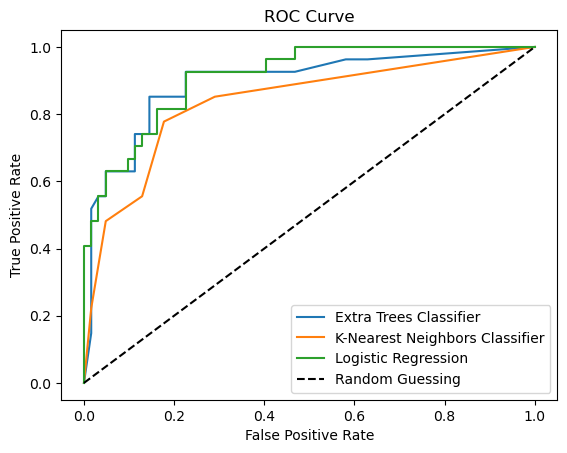

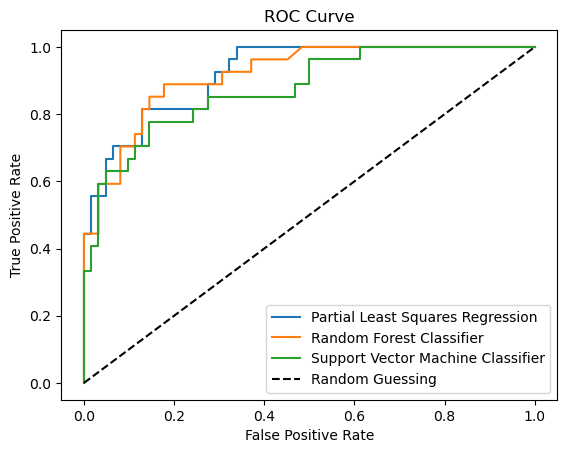

In [7]:
et_probs = et.predict_proba(X_test)[:, 1]
knn_probs = knn.predict_proba(X_test)[:, 1]
lr_probs = lr.predict_proba(X_test)[:, 1]

pls_probs = pls.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]
svm_probs = svm.decision_function(X_test)

et_fpr, et_tpr, et_thresholds = roc_curve(Y_test, et_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(Y_test, knn_probs)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(Y_test, lr_probs)
pls_fpr, pls_tpr, pls_thresholds = roc_curve(Y_test, pls_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf_probs)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(Y_test, svm_probs)



plt.plot(et_fpr, et_tpr, label='Extra Trees Classifier' )
plt.plot(knn_fpr, knn_tpr, label='K-Nearest Neighbors Classifier')
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.plot(pls_fpr, pls_tpr, label='Partial Least Squares Regression')
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier')
plt.plot(svm_fpr, svm_tpr, label='Support Vector Machine Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

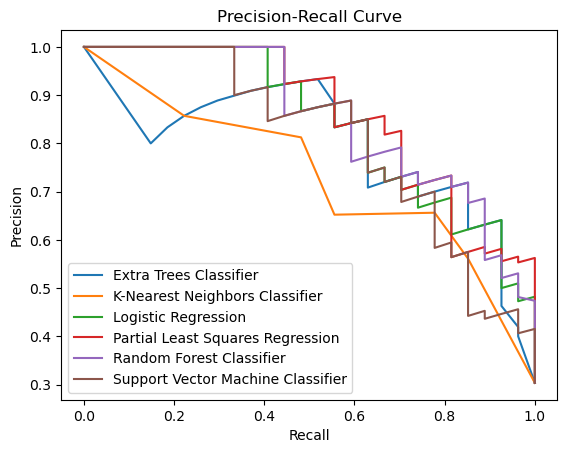

In [8]:
et_precision, et_recall, et_thresholds = precision_recall_curve(Y_test, et_probs)
knn_precision, knn_recall, knn_thresholds = precision_recall_curve(Y_test, knn_probs)
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(Y_test, lr_probs)
pls_precision, pls_recall, pls_thresholds = precision_recall_curve(Y_test, pls_probs)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(Y_test, rf_probs)
svm_precision, svm_recall, svm_thresholds = precision_recall_curve(Y_test, svm_probs)

plt.plot(et_recall, et_precision, label='Extra Trees Classifier')
plt.plot(knn_recall, knn_precision, label='K-Nearest Neighbors Classifier')
plt.plot(lr_recall, lr_precision, label='Logistic Regression')
plt.plot(pls_recall, pls_precision, label='Partial Least Squares Regression')
plt.plot(rf_recall, rf_precision, label='Random Forest Classifier')
plt.plot(svm_recall, svm_precision, label='Support Vector Machine Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [9]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = {
                 "n_estimators": [5,10,20,50, 100, 1000],
                 "max_depth":[5,8,15,25,30],
                 'max_features': ['log2', 'sqrt'],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4],
                    'bootstrap': [True, False],
                 "max_leaf_nodes": [2, 5,10]}

# Create a gridsearch of the pipeline, the fit the best model
pipe = Pipeline([("classifier", RandomForestClassifier())])
gridsearch = GridSearchCV(estimator= RandomForestClassifier(),param_grid= grid_param, cv=5, verbose=1,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))
print("The best parameters are ", best_model.best_params_)


Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


RandomForestClassifier(max_depth=15, max_features='log2', max_leaf_nodes=10,
                       min_samples_split=10, n_estimators=20)
The mean accuracy of the model is: 0.8426966292134831
The best parameters are  {'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}


In [10]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters={'n_estimators': [10, 20, 50, 100, 200, 500, 1000, 1200, 1500, 1800, 1900, 2000, 2100, 3000]}


# Create a gridsearch of the pipeline, the fit the best model
pipe = ExtraTreesClassifier()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))

ExtraTreesClassifier(n_estimators=200)
The mean accuracy of the model is: 0.8314606741573034


In [11]:
#hyperparameter tuning
# Create a pipeline

# Create dictionary with candidate learning algorithms and their hyperparameters
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'p': [1, 2]}
# Create a gridsearch of the pipeline, the fit the best model
pipe = KNeighborsClassifier()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))


KNeighborsClassifier(leaf_size=10, n_neighbors=7, p=1, weights='distance')
The mean accuracy of the model is: 0.8202247191011236


In [23]:
from sklearn.model_selection import RandomizedSearchCV
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
param_dist = {'C': [0.1, 1, 10, 100, 1000],

              'kernel': ['rbf','poly','sigmoid','linear']}
# Create a gridsearch of the pipeline, the fit the best model
clf = SVC()


random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, verbose=3, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV
random_search.fit(X_train, Y_train)

# Get the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Predict on the test set
y_pred = random_search.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == Y_test)
print("Accuracy:", accuracy)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 4/5] END ................C=0.1, kernel=poly;, score=0.757 total time=   0.0s
[CV 5/5] END ................C=0.1, kernel=poly;, score=0.771 total time=   0.0s
[CV 1/5] END .............C=0.1, kernel=sigmoid;, score=0.831 total time=   0.0s
[CV 2/5] END .............C=0.1, kernel=sigmoid;, score=0.887 total time=   0.0s
[CV 3/5] END .............C=0.1, kernel=sigmoid;, score=0.817 total time=   0.0s
[CV 4/5] END .............C=0.1, kernel=sigmoid;, score=0.843 total time=   0.0s
[CV 5/5] END .............C=0.1, kernel=sigmoid;, score=0.771 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.845 total time=   0.0s
[CV 3/5] END ................C=0.1, kernel=poly;, score=0.761 total time=   0.0s
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.718 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.930 total time=   0.1s
[CV 3/5] END ..............C

In [25]:

print(random_search.best_estimator_)

SVC(C=1)


In [ ]:
#hyperparameter tuning
# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters = {'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# Create a gridsearch of the pipeline, the fit the best model   
pipe = PLSRegression()

    


In [28]:
#hyperparameter tuning

# Create a pipeline
# Create dictionary with candidate learning algorithms and their hyperparameters
parameters={'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
# Create a gridsearch of the pipeline, the fit the best model
pipe = LogisticRegression()
gridsearch = GridSearchCV(pipe, parameters, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, Y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test, Y_test))
print("The best parameters are ", best_model.best_params_)


/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pai

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='saga')
The mean accuracy of the model is: 0.8426966292134831
The best parameters are  {'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pait/anaconda3/envs/my_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/pai

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

rf_clf=RandomForestClassifier(max_depth=15, max_features='log2', max_leaf_nodes=10,
                       min_samples_split=10, n_estimators=20)
knn_clf=KNeighborsClassifier( leaf_size=10, n_neighbors=7, p=1,weights='distance')

et_clf=ExtraTreesClassifier(n_estimators=200)

svc_clf=SVC(C=1)





# Fit the classifiers and perform cross-validation
clfs = [rf_clf, et_clf, knn_clf, svc_clf]
for clf in clfs:
    pipe = make_pipeline(StandardScaler(), clf)
    scores = cross_val_score(pipe, X_train, Y_train, cv=5, scoring='accuracy')
    y_pred = cross_val_predict(pipe, X_train, Y_train, cv=5)
    bacc = balanced_accuracy_score(Y_train, y_pred)
    mcc = matthews_corrcoef(Y_train, y_pred)
    tn, fp, fn, tp = confusion_matrix(Y_train, y_pred).ravel()
    sn = tp / (tp + fn)
    sp = tn / (tn + fp)
    auc = roc_auc_score(Y_train, y_pred)
    print(f"{type(clf).__name__}: Accuracy: {scores.mean()}, Std: {scores.std()}, BACC: {bacc}, MCC: {mcc}, Sensitivity: {sn}, Specificity: {sp}, AUC: {auc}")

# Apply Voting Classifier
voting_clf = VotingClassifier(estimators=[('rf', rf_clf), ('et', et_clf), ('knn', knn_clf), ('svc', svc_clf)], voting='hard')
pipe_voting = make_pipeline(StandardScaler(), voting_clf)
pipe_voting.fit(X_train, Y_train)
y_pred_voting = pipe_voting.predict(X_test)
print(f"Voting Classifier: Accuracy: {accuracy_score(Y_test, y_pred_voting)}")
bacc = balanced_accuracy_score(Y_test, y_pred_voting)
mcc = matthews_corrcoef(Y_test, y_pred_voting)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_voting).ravel()
sn = tp / (tp + fn)
sp = tn / (tn + fp)
auc = roc_auc_score(Y_test, y_pred_voting)
print(f"Voting Classifier: BACC: {bacc}, MCC: {mcc}, Sensitivity: {sn}, Specificity: {sp}, AUC: {auc}")

# Apply Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('rf', rf_clf), ('et', et_clf), ('knn', knn_clf), ('svc', svc_clf)],final_estimator=SVC())
pipe_stacking = make_pipeline(StandardScaler(), stacking_clf)
pipe_stacking.fit(X_train, Y_train)
y_pred_stacking = pipe_stacking.predict(X_test)
print(f"Stacking Classifier: Accuracy: {accuracy_score(Y_test, y_pred_stacking)}")
#print bacc mcc sn sp auc
bacc = balanced_accuracy_score(Y_test, y_pred_stacking)
mcc = matthews_corrcoef(Y_test, y_pred_stacking)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_stacking).ravel()
sn = tp / (tp + fn)
sp = tn / (tn + fp)
auc = roc_auc_score(Y_test, y_pred_stacking)
print(f"Stacking Classifier: BACC: {bacc}, MCC: {mcc}, Sensitivity: {sn}, Specificity: {sp}, AUC: {auc}")


# Final estimate using SVC
final_svc_clf = SVC(C=1000, gamma=1, kernel='linear')
pipe_final_svc = make_pipeline(StandardScaler(), final_svc_clf)
pipe_final_svc.fit(X_train, Y_train)
y_pred_final_svc = pipe_final_svc.predict(X_test)
print(f"Final estimate using SVC: Accuracy: {accuracy_score(Y_test, y_pred_final_svc)}")

RandomForestClassifier: Accuracy: 0.8352917505030181, Std: 0.062359912677912153, BACC: 0.7810840707964601, MCC: 0.6017442428361626, Sensitivity: 0.6371681415929203, Specificity: 0.925, AUC: 0.7810840707964603
ExtraTreesClassifier: Accuracy: 0.8497384305835011, Std: 0.018031761642607818, BACC: 0.8281895280235988, MCC: 0.66451476897208, Sensitivity: 0.7522123893805309, Specificity: 0.9041666666666667, AUC: 0.8281895280235989
KNeighborsClassifier: Accuracy: 0.8299396378269618, Std: 0.018729530564070715, BACC: 0.7813421828908554, MCC: 0.5959111928686537, Sensitivity: 0.6460176991150443, Specificity: 0.9166666666666666, AUC: 0.7813421828908553
SVC: Accuracy: 0.8440241448692154, Std: 0.026413353956994297, BACC: 0.8058075221238938, MCC: 0.6332318365743359, Sensitivity: 0.6991150442477876, Specificity: 0.9125, AUC: 0.8058075221238937
Voting Classifier: Accuracy: 0.8202247191011236
Voting Classifier: BACC: 0.7664277180406213, MCC: 0.5595659014034753, Sensitivity: 0.6296296296296297, Specificity